# 🍊 제주도 특산물 가격 예측 경진대회

Dataset Info.

1. train.csv

train 데이터 : 2019년 01월 01일부터 2023년 03월 03일까지의 유통된 품목의 가격 데이터 
    
item: 품목 코드
TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추
corporation : 유통 법인 코드
법인 A부터 F 존재
location : 지역 코드
J : 제주도 제주시
S : 제주도 서귀포시
supply(kg) : 유통된 물량, kg 단위
price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위


2. international_trade.csv

관련 품목 수출입 정보


3. test.csv

test 데이터 : 2023년 03월 04일부터 2023년 03월 31일까지의 데이터


4. sample_submission.csv

제출을 위한 양식
2023년 03월 04일부터 2023년 03월 31일까지의 price(원/kg)을 예측
ID는 품목, 유통 법인, 지역 코드로 구성된 식별자
해당 ID에 맞춰 price(원/kg) 예측값을 answer 컬럼에 기입해야 함


# 타겟 : price

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
import catboost
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/User/Desktop/데이콘_제주도/open/train.csv')
data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [3]:
data.tail()

data.info()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0
59396,RD_F_J_20230303,2023-03-03,RD,F,J,427520.0,529.0


In [4]:
data['item'].value_counts()

data['item'].value_counts()

TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: item, dtype: int64

In [5]:
data.isna().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [6]:
type(data['timestamp'][0])

type(data['timestamp'][0])

str

In [7]:
import datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

import datetime
data['timestamp']=pd.to_datetime(data['timestamp'])

In [8]:
type(data['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='item', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


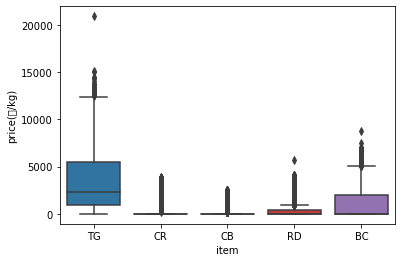

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='item',y='price(원/kg)',data=data)

--------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='item',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='corporation', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


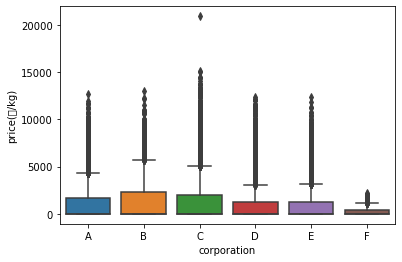

In [10]:
sns.boxplot(x='corporation',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='location', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


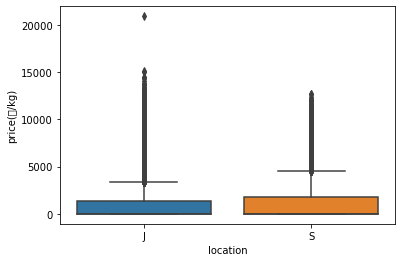

In [11]:
sns.boxplot(x='location',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


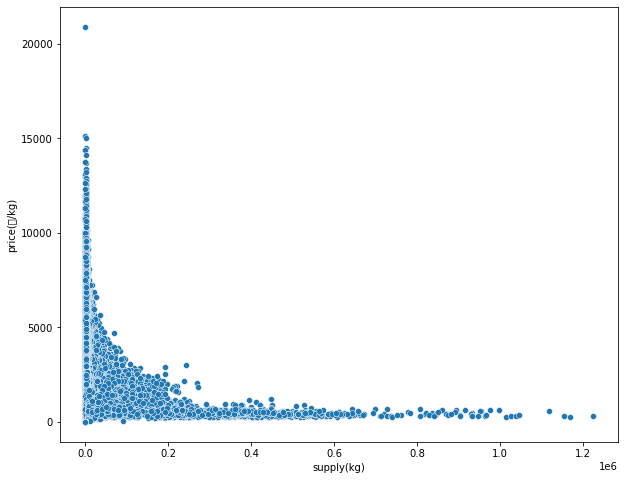

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


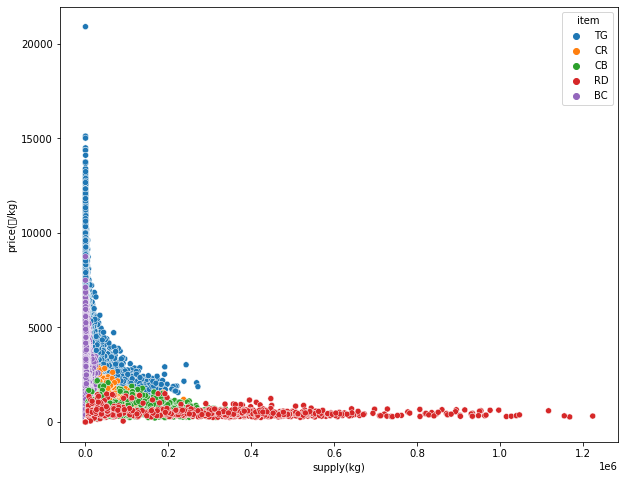

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)',hue='item')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


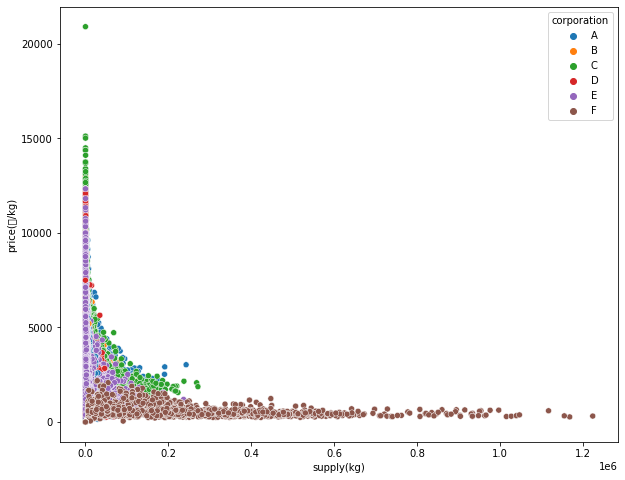

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)',hue='corporation')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


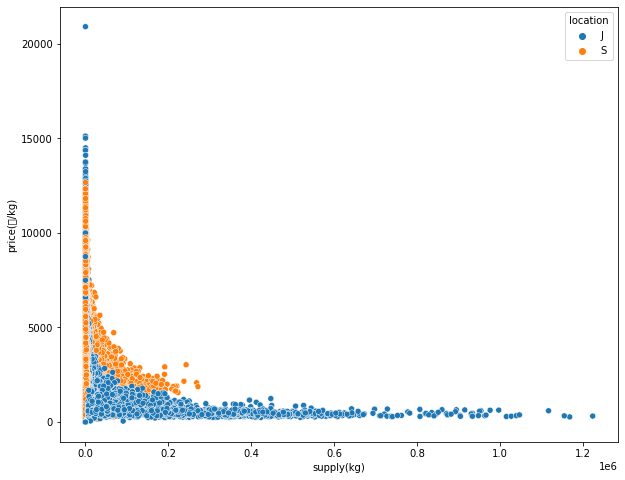

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)',hue='location')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x576 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


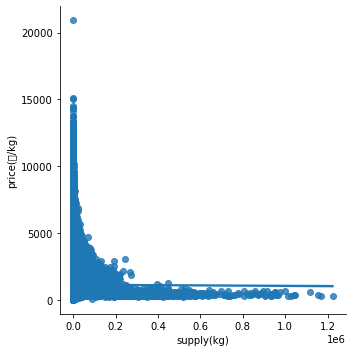

In [16]:
plt.figure(figsize=(10,8))
sns.lmplot(data=data,x ='supply(kg)',y='price(원/kg)')

In [17]:
data.groupby('item')['price(원/kg)'].sum()

item
BC    12476065.0
CB     1158905.0
CR     2911721.0
RD     2279304.0
TG    48392442.0
Name: price(원/kg), dtype: float64

In [18]:
data.groupby('location')['price(원/kg)'].sum()

location
J    37213110.0
S    30005327.0
Name: price(원/kg), dtype: float64

In [19]:
data.groupby('corporation')['price(원/kg)'].sum()

corporation
A    15649343.0
B    11763166.0
C    13418396.0
D    12490909.0
E    13107338.0
F      789285.0
Name: price(원/kg), dtype: float64

In [20]:
data[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [21]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data


,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


<AxesSubplot:xlabel='month', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


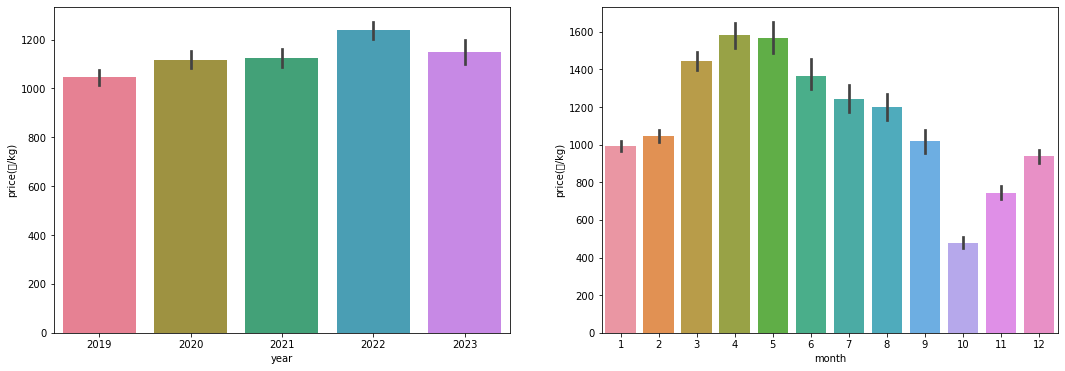

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=data,x='year',y='price(원/kg)',ax=axes[0],palette='husl')
sns.barplot(data=data,x='month',y='price(원/kg)',ax=axes[1])

In [23]:
items = data['item'].value_counts().index.to_list()
items

['TG', 'BC', 'RD', 'CR', 'CB']

5개의 서브플롯을 가진 그림을 생성하고, 각 아이템별로 'supply(kg)'과 'price(원/kg)'의 관계를 산점도로 나타내는 과정

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


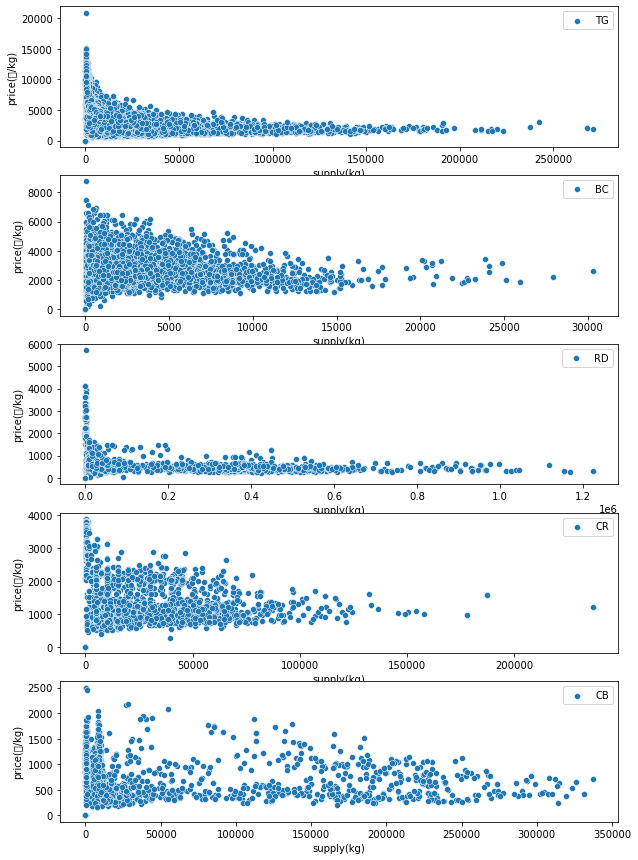

In [24]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = data[data['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])
--------------------------------------------
fig,axes=plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r=i%5
    sns.scatterplot(data=data[data['itme']==items[i]], x='supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])


corp 변수는 데이터셋에서 'corporation' 열의 고유값들을 빈도수 순으로 정렬하여 리스트로 저장하는 과정이다.

In [25]:
corp = data['corporation'].value_counts().index.to_list()
corp

--------------------------------------------
corp=data['corporation'].value_counts().index.to_list()

corp=data['corporation'].value_counts().index.to_list()

['A', 'E', 'D', 'C', 'B', 'F']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


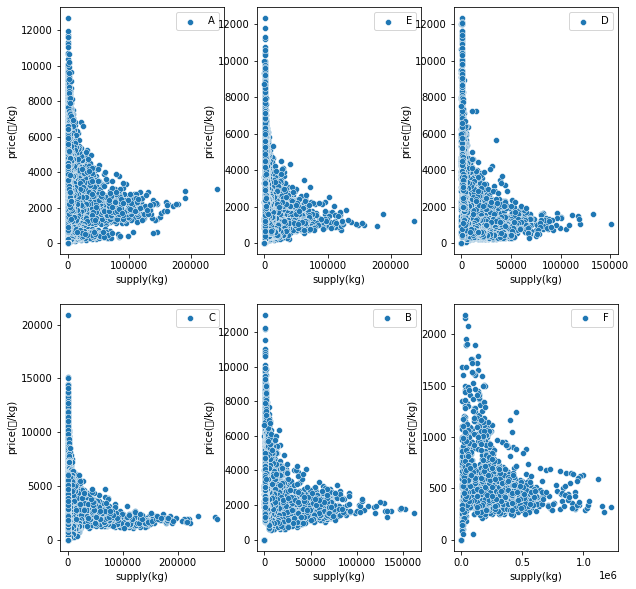

In [26]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = data[data['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])

--------------------------------------------
fig,axes= plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r=i%3
    sns.scatterplot(data=data[data['corporation']==corp[i]],x='supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])


In [27]:
loc = data['location'].value_counts().index.to_list()
loc

--------------------------------------------
loc=data['location'].value_counts().index.to_flat_index

loc=data['location'].value_counts().index.to_flat_index

['J', 'S']

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


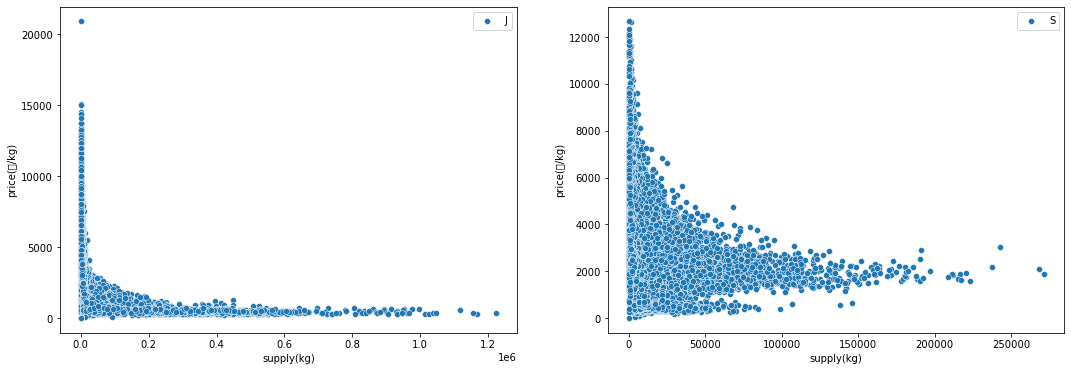

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data = data[data['location']==loc[0]], x = 'supply(kg)',y='price(원/kg)',label=loc[0],ax = axes[0])
sns.scatterplot(data = data[data['location']==loc[1]], x = 'supply(kg)',y='price(원/kg)',label=loc[1],ax = axes[1])

--------------------------------------------
fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.scatterplot(data=data[data['location']==loc[0]],x='supply(kg)',y='price(원/kg)',label=loc[0],ax=axes[0])
sns.scatterplot(data=data[data['Location']==loc[1]],x='supply(kg)',y='price(원/kg)',label=loc[0],ax=axes[1])

# supply 가 0 인경우가 몰려있음

In [29]:
data[data['supply(kg)']==0]
--------------------------------------------
data[data['supply(kg)']==0]

data[data['supply(kg)']==0]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
5,TG_A_J_20190106,2019-01-06,TG,A,J,0.0,0.0,2019,1,6
12,TG_A_J_20190113,2019-01-13,TG,A,J,0.0,0.0,2019,1,13
19,TG_A_J_20190120,2019-01-20,TG,A,J,0.0,0.0,2019,1,20
...,...,...,...,...,...,...,...,...,...,...
59363,RD_F_J_20230129,2023-01-29,RD,F,J,0.0,0.0,2023,1,29
59370,RD_F_J_20230205,2023-02-05,RD,F,J,0.0,0.0,2023,2,5
59377,RD_F_J_20230212,2023-02-12,RD,F,J,0.0,0.0,2023,2,12
59384,RD_F_J_20230219,2023-02-19,RD,F,J,0.0,0.0,2023,2,19


In [30]:
len(data) , len(data[data['supply(kg)']==0])

--------------------------------------------
len(data), len(data[data['supply(kg)']==0])

len(data), len(data[data['supply(kg)']==0])

(59397, 35452)

In [31]:
len(data[data['supply(kg)']==0]) / len(data)

--------------------------------------------
len(data[data['supply(kg)']==0])/len(data)

0.5968651615401451

# supply 0인경우 제외

In [32]:
sup_notzero = data[data['supply(kg)']!=0]
sup_notzero 

--------------------------------------------
sup_notzero= data[data['supply(kg)']!=0]

sup_notzero=data[data['supply(kg)']!=0]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


items라는 리스트(또는 다른 컬렉션)를 순회하는 for 루프가 있으며, 이는 각각의 item에 대해 scatter plot을 그리기 위한 것이다. r = i%5를 통해 현재 item이 그려질 subplot의 row 인덱스를 계산한다. 이는 모든 items를 5개의 subplot 중 하나에 순차적으로 할당하기 위함이다.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


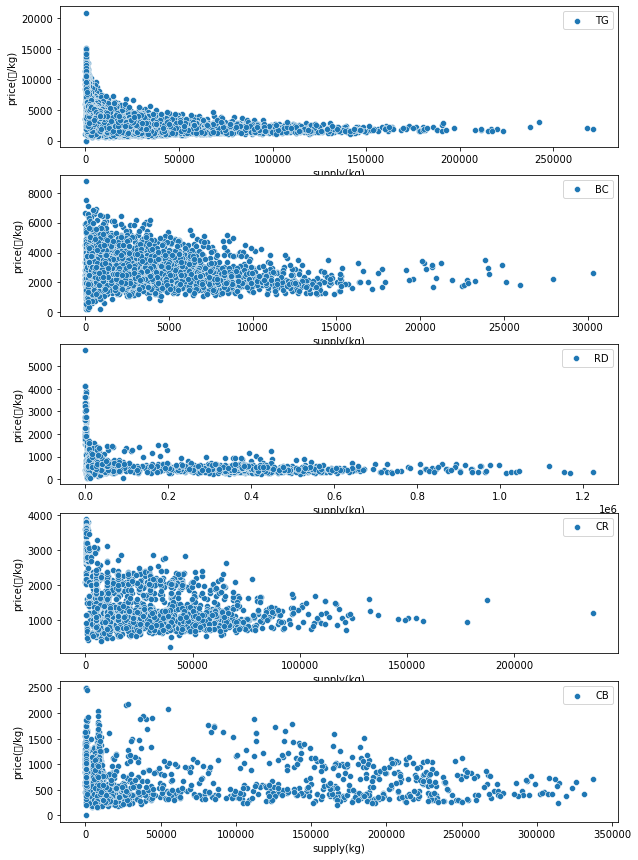

In [33]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = sup_notzero[sup_notzero['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])
--------------------------------------------
fig,axes=plt.subplots(5,1,figsize=(10,15))

for i in range(len(items)):
    r=i%5
    sns.scatterplot(data=sup_notzero[sup_notzero['item']==items[i]],x='supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])

In [97]:
sup_notzero['item'].value_counts()

--------------------------------------------
sup_notzero['item'].value_counts()

TG    11675
BC     4525
RD     4040
CR     2082
CB     1620
Name: item, dtype: int64

In [126]:
sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')
sup_notzero['y-m']
--------------------------------------------
sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')
sup_notzero['y-m']

sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')
sup_notzero['y-m']

0        2019-01
1        2019-01
2        2019-01
3        2019-01
4        2019-01
          ...   
23940    2023-02
23941    2023-02
23942    2023-03
23943    2023-03
23944    2023-03
Name: y-m, Length: 23942, dtype: object

'TG' 아이템에 대해 월별 평균 가격('price(원/kg)')을 선 그래프로 시각화

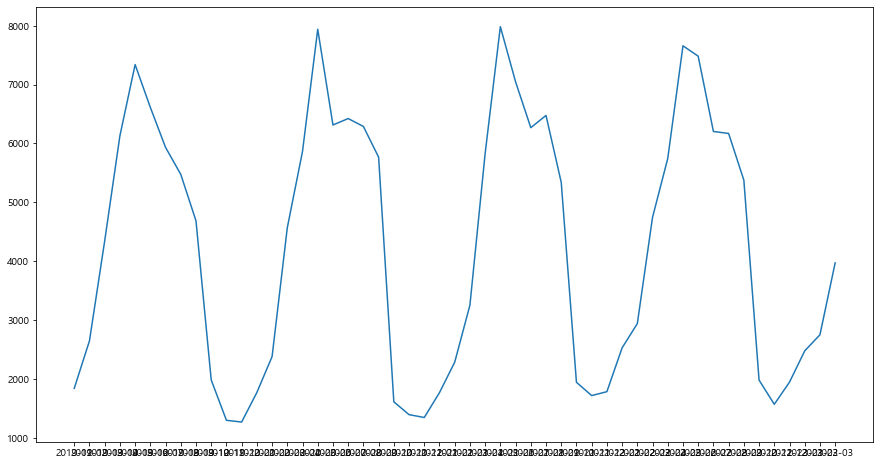

In [127]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'TG'].groupby(['y-m'])['price(원/kg)'].mean())

--------------------------------------------
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item']=='TG'].groupby(['y-m'])['price(원/kg)'].mean())

BC' 항목에 해당하는 데이터를 선택하고, 'y-m'으로 그룹화하여 'price(원/kg)'의 평균값을 계산한 후, 그 결과를 15x8 크기의 그래프로 시각화

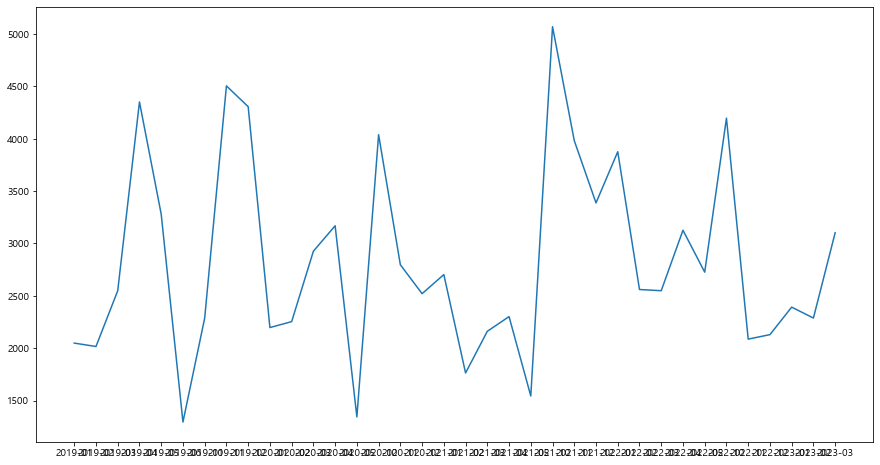

In [128]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'BC'].groupby(['y-m'])['price(원/kg)'].mean())
--------------------------------------------
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item']=='BC'].groupby(['y-m'])['price(원/kg)'].mean())

plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['itme']=='BC'].groupby(['y-m'])['price(원/kg)'].mean())

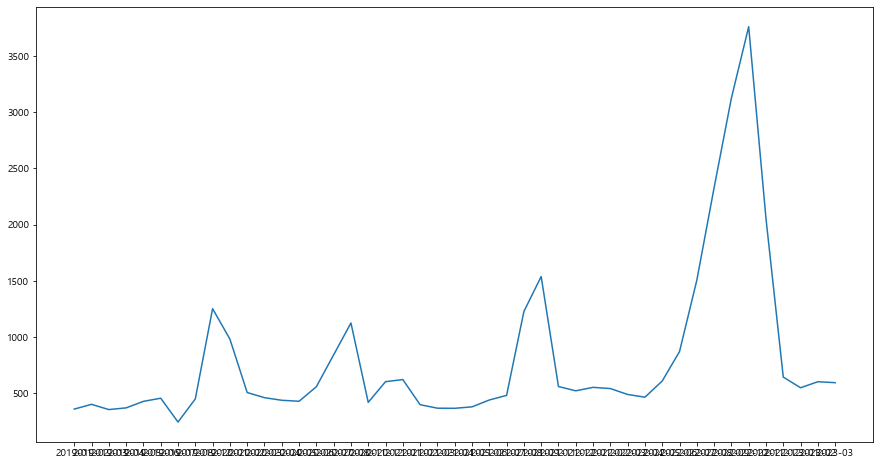

In [129]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'RD'].groupby(['y-m'])['price(원/kg)'].mean())

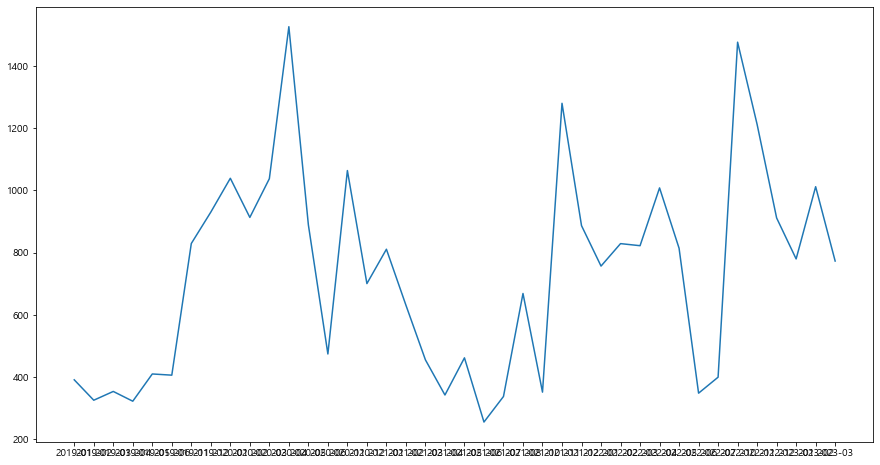

In [131]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'CB'].groupby(['y-m'])['price(원/kg)'].mean())

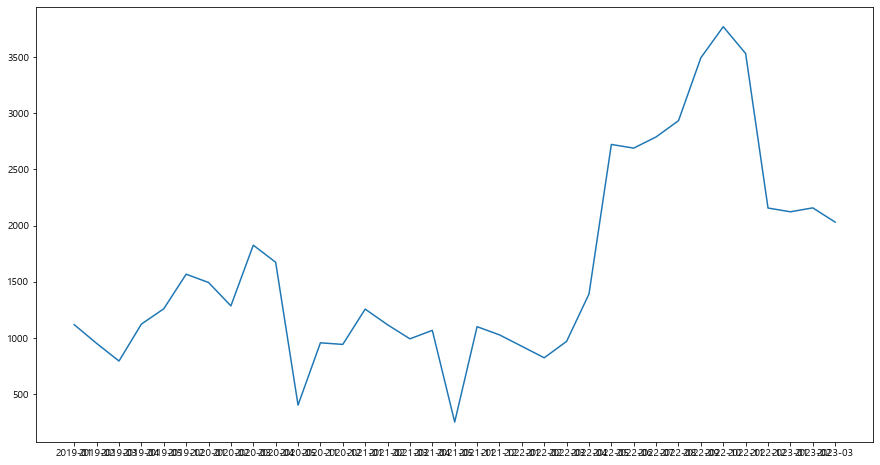

In [132]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'CR'].groupby(['y-m'])['price(원/kg)'].mean())

annot=True는 seaborn의 heatmap 함수에서 사용되며, 각 셀에 상관 계수 값을 표시하는 역할을 한다

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'all')

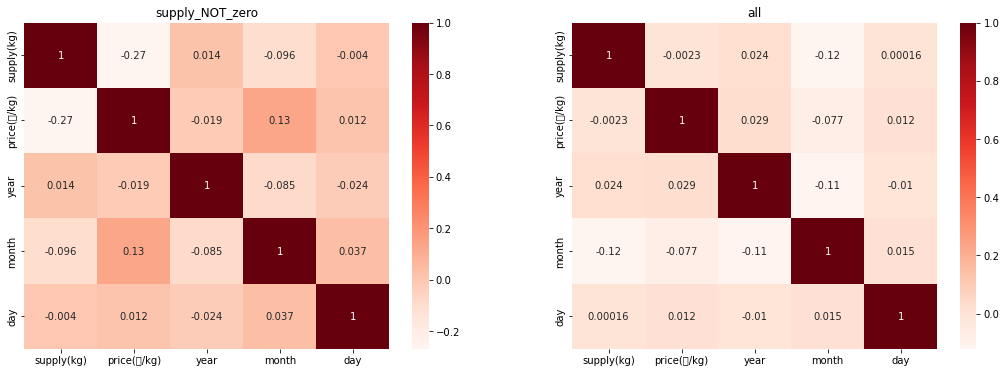

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(sup_notzero.corr(),annot=True,cmap='Reds',ax = axes[0])
axes[0].set_title('supply_NOT_zero')
sns.heatmap(data.corr(),annot=True,cmap='Reds',ax = axes[1])
axes[1].set_title('all')

--------------------------------------------
fig,axes=plt.subplots(1,2,figsize=(18,6))

sns.heatmap(sup_notzero.corr(),anoot=True,cmap='Reds',ax=axes[0])
axes[0].set_title('supply_NOT_zero')
sns.heatmap(data.corr(),annot=True,cmap='Reds',ax=axes[1])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


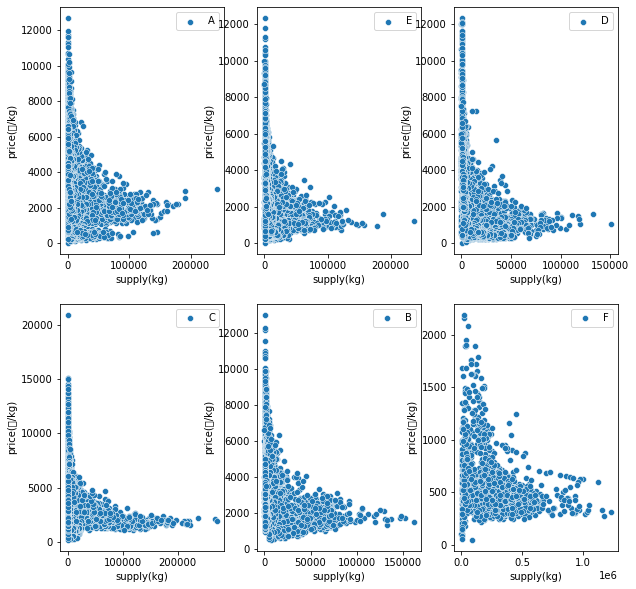

In [35]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = sup_notzero[sup_notzero['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])
--------------------------------------------
fig,axes=plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = sup_notzero[sup_notzero['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])
--------------------------------------------

<AxesSubplot:xlabel='month', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


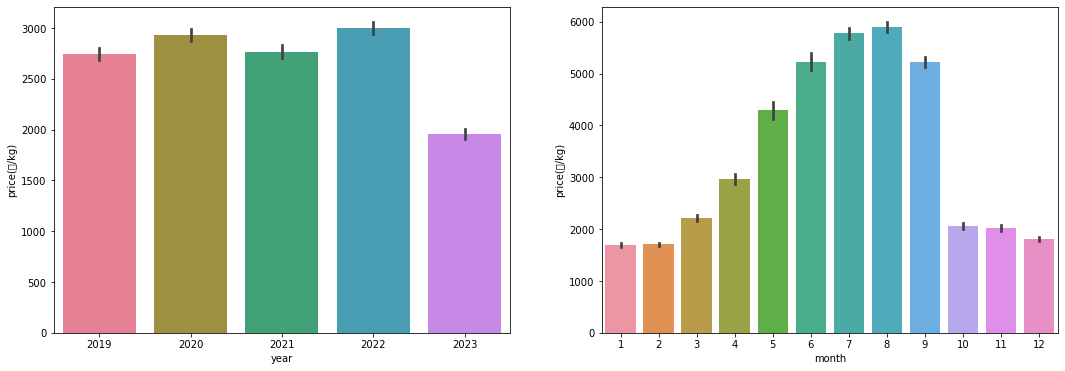

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=sup_notzero,x='year',y='price(원/kg)',ax=axes[0],palette='husl')
sns.barplot(data=sup_notzero,x='month',y='price(원/kg)',ax=axes[1])

## supply 0 인경우 제외해봄 
눈에 띄는 차이는 없는듯

# 휴일 여부 넣어보기

In [37]:
from pytimekr import pytimekr

In [38]:
year_2019 = pytimekr.holidays(year=2019)
year_2020 = pytimekr.holidays(year=2020)
year_2021 = pytimekr.holidays(year=2021)
year_2022 = pytimekr.holidays(year=2022)
year_2023 = pytimekr.holidays(year=2023)



def holidays(x):
    if x.weekday() in range(5,8):
        return 1
    if x.year == 2019  and x in year_2019 :
        return 1 
    elif x.year == 2020 and x in year_2020:
        return 1 
    elif x.year == 2021 and x in year_2021 :
        return 1 
    elif x.year == 2022 and x in year_2022 :
        return 1
    elif x.year == 2023 and x in year_2023:
        return 1
    else:
        return 0

In [39]:
import warnings
warnings.filterwarnings('ignore')
data['holiday'] = data['timestamp'].apply(holidays)
data

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,0


In [40]:
data['holiday'].value_counts()

0    40872
1    18525
Name: holiday, dtype: int64

<AxesSubplot:xlabel='location', ylabel='price(원/kg)'>

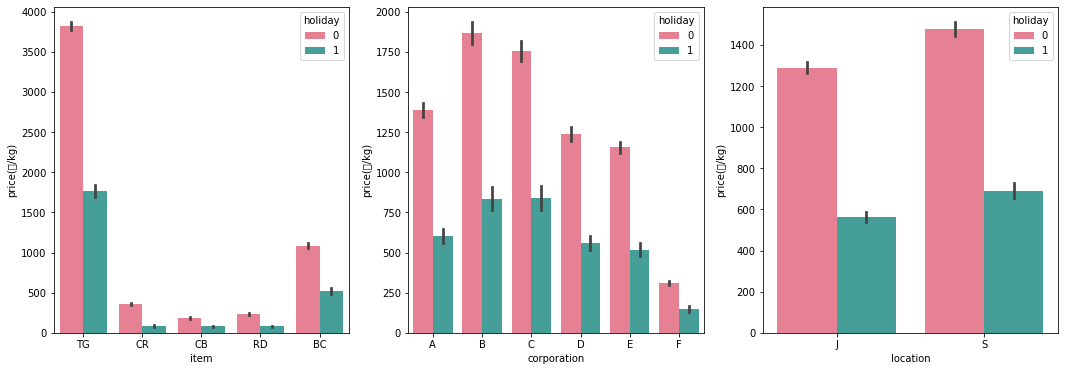

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=data,x='item',y='price(원/kg)',hue='holiday',ax=axes[0],palette='husl')
sns.barplot(data=data,x='corporation',y='price(원/kg)',hue='holiday',ax=axes[1],palette='husl')
sns.barplot(data=data,x='location',y='price(원/kg)',hue='holiday',ax=axes[2],palette='husl')

# 법정 휴일이냐 아니냐에 따라 차이가 있음

<AxesSubplot:>

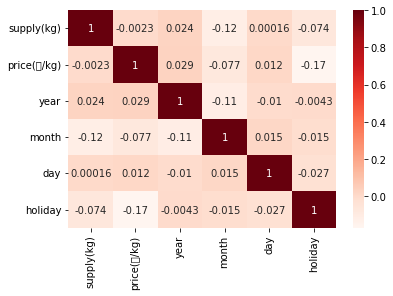

In [42]:
sns.heatmap(data.corr(),annot=True,cmap='Reds')

In [43]:
data.columns

Index(['ID', 'timestamp', 'item', 'corporation', 'location', 'supply(kg)',
       'price(원/kg)', 'year', 'month', 'day', 'holiday'],
      dtype='object')

In [44]:
df1= pd.pivot_table(data,index='item',values='price(원/kg)',aggfunc='sum')
df1['비율'] = (df1['price(원/kg)']/df1['price(원/kg)'].sum())*100
df1

,price(원/kg),비율
item,,
BC,12476065.0,18.560481
CB,1158905.0,1.724088
CR,2911721.0,4.331730
RD,2279304.0,3.390891
TG,48392442.0,71.992811


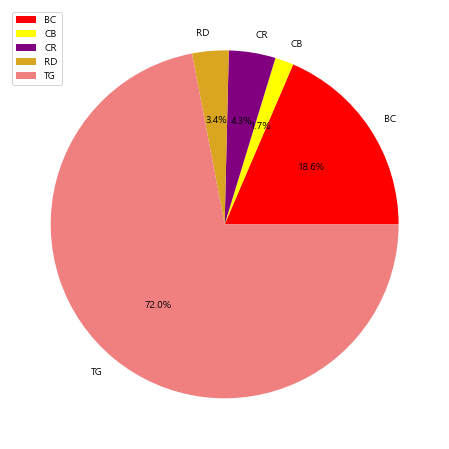

In [45]:
plt.figure(figsize=(10,8))
colors = ['red','yellow','purple','goldenrod','lightcoral']
plt.rc('font',family='Malgun Gothic')
# TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추
plt.pie(data = df1,x = 'price(원/kg)',labels=df1.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

In [46]:
df2 = pd.pivot_table(data,index='corporation',values='price(원/kg)',aggfunc='sum')
df2['비율'] = (df2['price(원/kg)']/df2['price(원/kg)'].sum())*100
df2

,price(원/kg),비율
corporation,,
A,15649343.0,23.281325
B,11763166.0,17.499910
C,13418396.0,19.962374
D,12490909.0,18.582564
E,13107338.0,19.499617
F,789285.0,1.174209


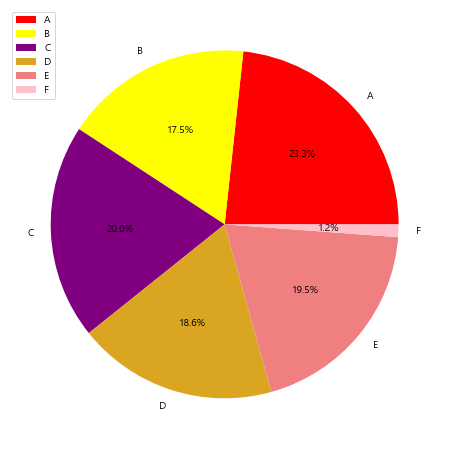

In [47]:
plt.figure(figsize=(10,8))
colors = ['red','yellow','purple','goldenrod','lightcoral','pink']
plt.rc('font',family='Malgun Gothic')
# TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추
plt.pie(data = df2,x = 'price(원/kg)',labels=df2.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

In [48]:
df3 = pd.pivot_table(data,index='location',values='price(원/kg)',aggfunc='sum')
df3['비율'] = (df3['price(원/kg)']/df3['price(원/kg)'].sum())*100
df3

,price(원/kg),비율
location,,
J,37213110.0,55.361463
S,30005327.0,44.638537


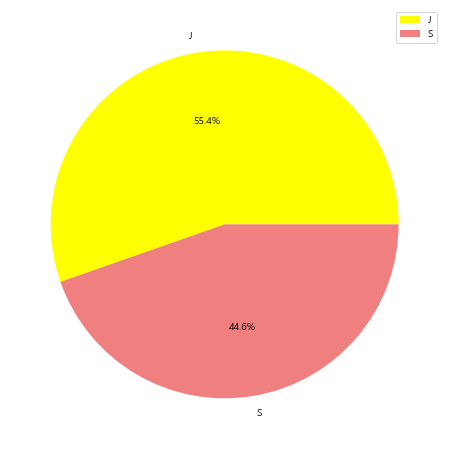

In [49]:
plt.figure(figsize=(10,8))
colors = ['yellow','lightcoral']
plt.rc('font',family='Malgun Gothic')
# TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추
plt.pie(data = df3,x = 'price(원/kg)',labels=df3.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

# 타겟변수 왜도 첨도 확인

<AxesSubplot:xlabel='price(원/kg)', ylabel='Density'>

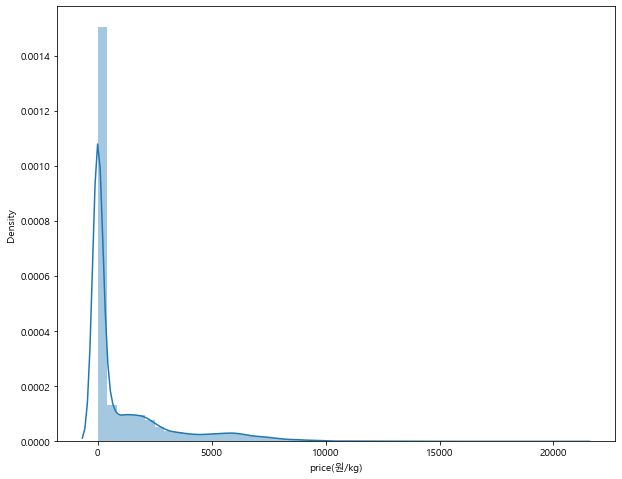

In [50]:
plt.figure(figsize=(10,8))
sns.distplot(data['price(원/kg)'])

<AxesSubplot:xlabel='price(원/kg)', ylabel='Density'>

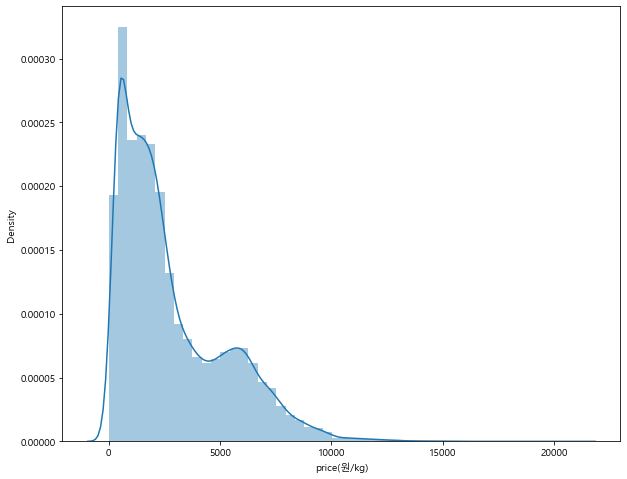

In [51]:
plt.figure(figsize=(10,8))
sns.distplot(sup_notzero['price(원/kg)'])

In [52]:
sup_notzero['price(원/kg)'].skew(), data['price(원/kg)'].skew()

(1.1612487018554112, 2.1854712324951593)

In [53]:
sup_notzero['price(원/kg)'].kurt(), data['price(원/kg)'].kurt()

(0.929802378581118, 4.687441664325403)

# 이상치 확인


<AxesSubplot:ylabel='price(원/kg)'>

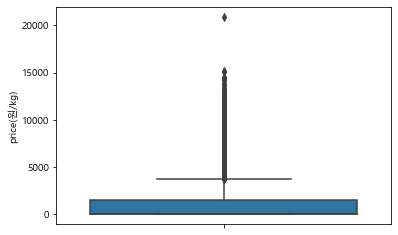

In [54]:
sns.boxplot(y='price(원/kg)',data=data)

<AxesSubplot:ylabel='price(원/kg)'>

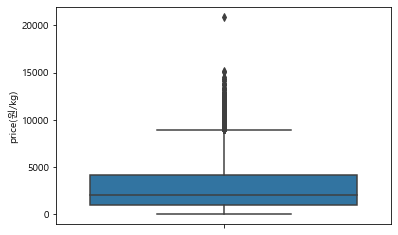

In [55]:
sns.boxplot(y='price(원/kg)',data=sup_notzero)

In [56]:
data.columns

Index(['ID', 'timestamp', 'item', 'corporation', 'location', 'supply(kg)',
       'price(원/kg)', 'year', 'month', 'day', 'holiday'],
      dtype='object')

In [57]:
# 이상치제거함수
from collections import Counter
import numpy as np
def outlier(df,n,cols):
    outs = []
    for col in cols :
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        step = 1.5*IQR
        indexes = df[(df[col] < Q1 - step)|(df[col] > Q3 + step)].index
        outs.extend(indexes)
    outs = Counter(outs)
    res = [k for k,v in outs.items() if v > n]
    return res

In [58]:
outlier_col = ['supply(kg)','price(원/kg)']
outlier(data,2,outlier_col)

[]

In [59]:
outlier(sup_notzero,2,outlier_col)

[]

In [60]:
data['supply(kg)'].value_counts()

0.0         35452
4300.0        181
8600.0         85
8620.0         84
200.0          83
            ...  
13289.0         1
11706.0         1
13522.0         1
17693.0         1
427520.0        1
Name: supply(kg), Length: 12521, dtype: int64

# 눈으로봤을때 잇는데 없는듯 넘어감

In [61]:
data

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,0


In [62]:
sup_notzero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [63]:
sup_notzero.reset_index(inplace=True)

In [64]:
sup_notzero.drop('index',axis=1,inplace=True)
sup_notzero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
1,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
2,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
3,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
4,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
23940,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
23941,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
23942,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
23943,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [65]:
sup_notzero = sup_notzero[sup_notzero['price(원/kg)']!=0]

#휴일여부

In [66]:
sup_notzero['holiday'] =sup_notzero['timestamp'].apply(holidays)
sup_notzero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,holiday
0,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,0
1,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,0
2,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,1
3,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7,0
4,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...
23940,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
23941,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,0
23942,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,1
23943,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,0


--------------------------------------------------------------------------------------------------------------------------------

In [67]:
trade = pd.read_csv('C:/Users/User/Desktop/데이콘_제주도/open/international_trade.csv')
trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [68]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      1274 non-null   object
 1   품목명     1274 non-null   object
 2   수출 중량   1274 non-null   int64 
 3   수출 금액   1274 non-null   int64 
 4   수입 중량   1274 non-null   int64 
 5   수입 금액   1274 non-null   int64 
 6   무역수지    1274 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 69.8+ KB


In [69]:
trade['품목명'].value_counts()

감귤                                                                               50
포포(papaw)[파파야(papaya)]                                                           50
레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]                               50
그레이프프루트(grapefruit)와 포멜로(pomelo)                                                 50
오렌지                                                                              50
망고(mango)                                                                        50
파인애플                                                                             50
무화과                                                                              50
대추야자                                                                             50
사과                                                                               50
오이류(신선한 것이나 냉장한 것으로 한정한다)                                                        50
당근                                                                          

In [70]:
df_test = trade[trade.품목명.str.contains('감귤|브로콜리|무|당근|양배추')]
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
12,2019-01,무화과,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737
1254,2023-02,순무,4000,4,2,0,4
1258,2023-02,무화과,1319,14,104566,454,-440


In [71]:
df_test['품목명'].value_counts()

꽃양배추와 브로콜리(broccoli)    50
방울다다기 양배추               50
양배추                     50
당근                      50
무화과                     50
감귤                      50
순무                       6
Name: 품목명, dtype: int64

# 무화과만 drop 하고 나머지 합쳐주기

### 꽃양배추와 브로콜리?

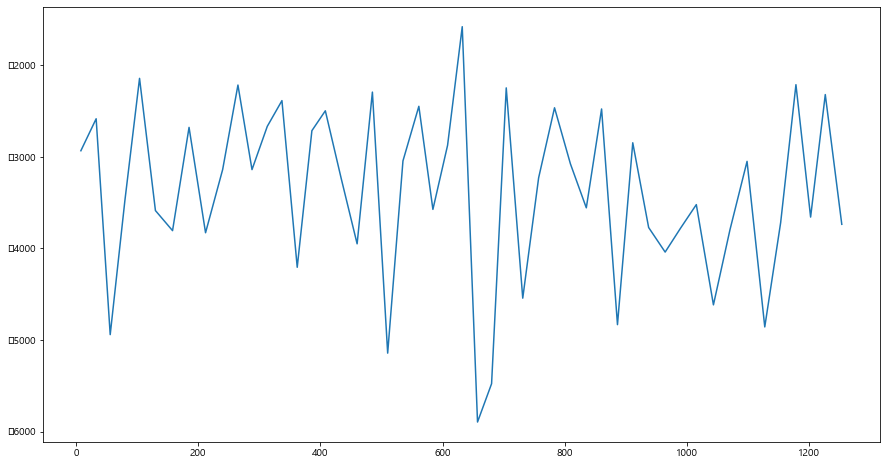

In [72]:
plt.figure(figsize=(15,8))
plt.plot(df_test[df_test['품목명'] == '당근']['무역수지'])

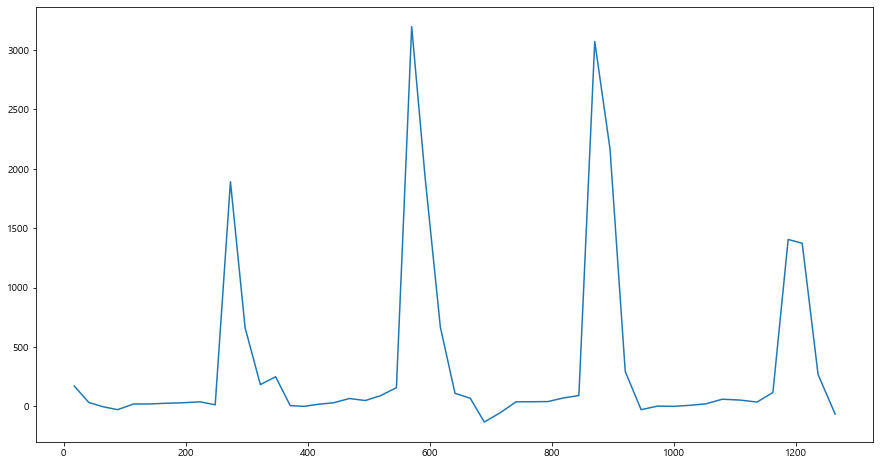

In [73]:
plt.figure(figsize=(15,8))
plt.plot(df_test[df_test['품목명'] == '감귤']['무역수지'])

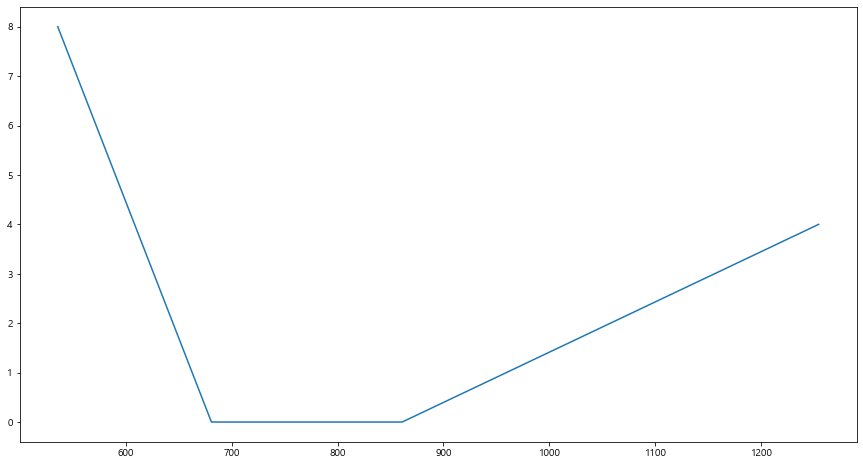

In [74]:
plt.figure(figsize=(15,8))
plt.plot(df_test[df_test['품목명'] == '순무']['무역수지'])

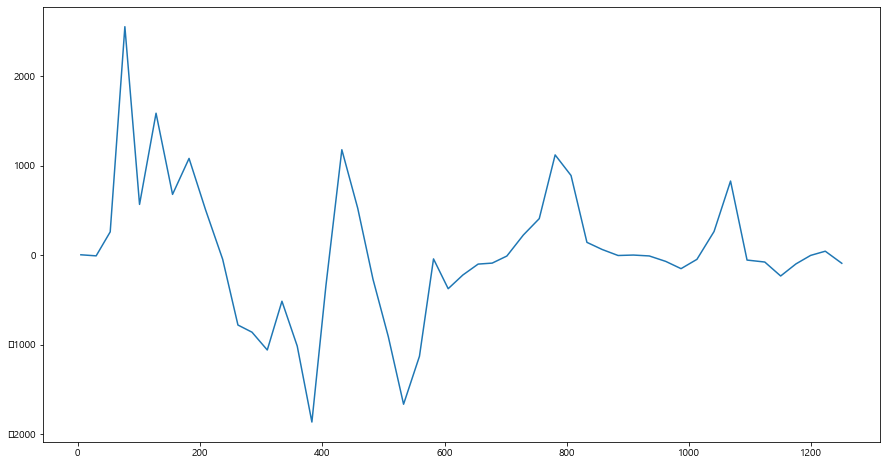

In [75]:
plt.figure(figsize=(15,8))
plt.plot(df_test[df_test['품목명'] == '양배추']['무역수지'])

In [76]:
df_test.loc[df_test['품목명']=='꽃양배추와 브로콜리(broccoli)','품목명'] = '브로콜리'
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,브로콜리,160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
12,2019-01,무화과,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737
1254,2023-02,순무,4000,4,2,0,4
1258,2023-02,무화과,1319,14,104566,454,-440


In [77]:
df_test.loc[df_test['품목명']=='방울다다기 양배추','품목명'] = '양배추'
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,브로콜리,160,1,638913,563,-562
4,2019-01,양배추,0,0,7580,38,-38
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
12,2019-01,무화과,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737
1254,2023-02,순무,4000,4,2,0,4
1258,2023-02,무화과,1319,14,104566,454,-440


In [78]:
df_test = df_test[df_test['품목명']!='무화과']
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,브로콜리,160,1,638913,563,-562
4,2019-01,양배추,0,0,7580,38,-38
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
17,2019-01,감귤,58368,172,0,0,172
...,...,...,...,...,...,...,...
1249,2023-02,양배추,71,1,10362,55,-55
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737
1254,2023-02,순무,4000,4,2,0,4


In [79]:
df_test.loc[df_test['품목명']=='순무','품목명'] = '무'
df_test

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,브로콜리,160,1,638913,563,-562
4,2019-01,양배추,0,0,7580,38,-38
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
17,2019-01,감귤,58368,172,0,0,172
...,...,...,...,...,...,...,...
1249,2023-02,양배추,71,1,10362,55,-55
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737
1254,2023-02,무,4000,4,2,0,4


In [80]:
df_test['품목명'].value_counts()

양배추     100
브로콜리     50
당근       50
감귤       50
무         6
Name: 품목명, dtype: int64

In [81]:
fruits_dict = {'감귤':'TG' ,'브로콜리':'BC' ,'무':'RD' ,'당근':'CR' ,'양배추':'CB'}
fruits_dict

{'감귤': 'TG', '브로콜리': 'BC', '무': 'RD', '당근': 'CR', '양배추': 'CB'}

In [82]:
df_test['품목명'] = df_test['품목명'].map(fruits_dict)

In [83]:
df_test.reset_index()

,index,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,3,2019-01,BC,160,1,638913,563,-562
1,4,2019-01,CB,0,0,7580,38,-38
2,5,2019-01,CB,184650,94,395802,90,4
3,8,2019-01,CR,23150,22,7466150,2955,-2934
4,17,2019-01,TG,58368,172,0,0,172
...,...,...,...,...,...,...,...,...
251,1249,2023-02,CB,71,1,10362,55,-55
252,1250,2023-02,CB,13188,13,377456,104,-91
253,1253,2023-02,CR,22510,20,9260020,3758,-3737
254,1254,2023-02,RD,4000,4,2,0,4


In [84]:
df_test[df_test.duplicated()]

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지


In [85]:
df_test.isna().sum()

기간       0
품목명      0
수출 중량    0
수출 금액    0
수입 중량    0
수입 금액    0
무역수지     0
dtype: int64

In [86]:
box_plot_cols = df_test.columns[2:-1]

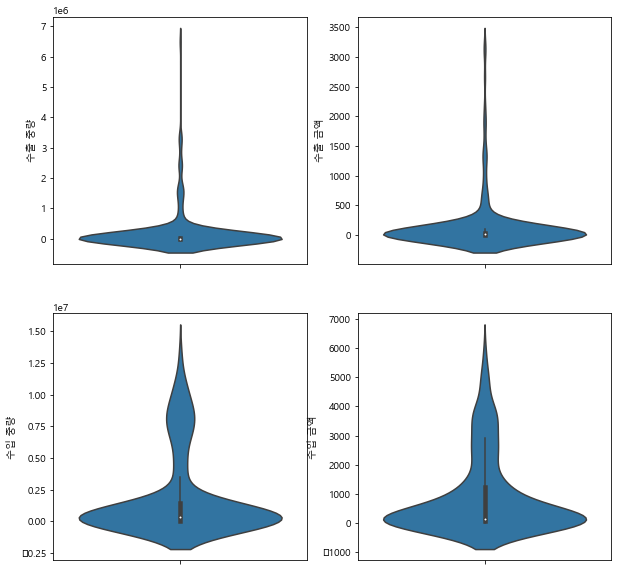

In [87]:

fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(len(box_plot_cols)):
    n=int(i/2)
    r = i%2
    sns.violinplot(data=df_test,y=box_plot_cols[i],ax=axes[n][r],hue='품목명')

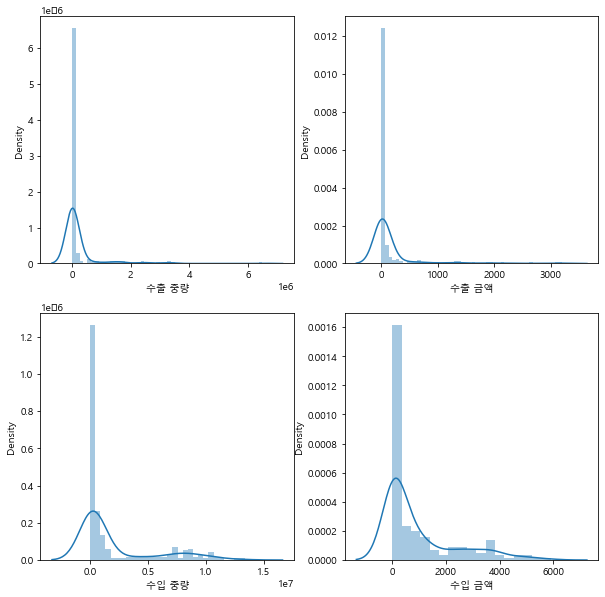

In [88]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(len(box_plot_cols)):
    n=int(i/2)
    r = i%2
    sns.distplot(df_test[box_plot_cols[i]],ax=axes[n][r])

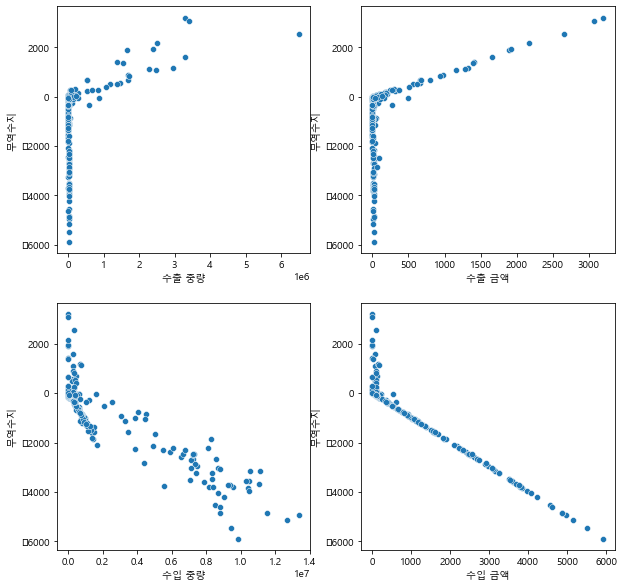

In [89]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(len(box_plot_cols)):
    n=int(i/2)
    r = i%2
    sns.scatterplot(data=df_test,x=box_plot_cols[i],y='무역수지',ax=axes[n][r])

In [90]:
df_test.loc[outlier(df_test,2,['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지'])]

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
77,2019-04,CB,6494616,2658,343463,105,2553
273,2019-11,TG,1663839,1892,1,0,1892
570,2020-11,TG,3289766,3197,0,0,3197
592,2020-12,TG,2396213,1928,0,0,1928
870,2021-11,TG,3399820,3072,0,0,3072
895,2021-12,TG,2502702,2170,0,0,2170
56,2019-03,CR,17960,13,13353720,4953,-4941
80,2019-04,CR,16910,14,8323700,3493,-3479
130,2019-06,CR,19500,14,7853590,3601,-3587
158,2019-07,CR,17000,11,9570280,3817,-3806


In [91]:
dropindex = outlier(df_test,2,['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지'])
df_test.drop(dropindex,inplace=True)


In [92]:
df_test.reset_index(inplace=True)

In [93]:
df_test.drop('index',axis=1,inplace=True)


<AxesSubplot:xlabel='무역수지', ylabel='Density'>

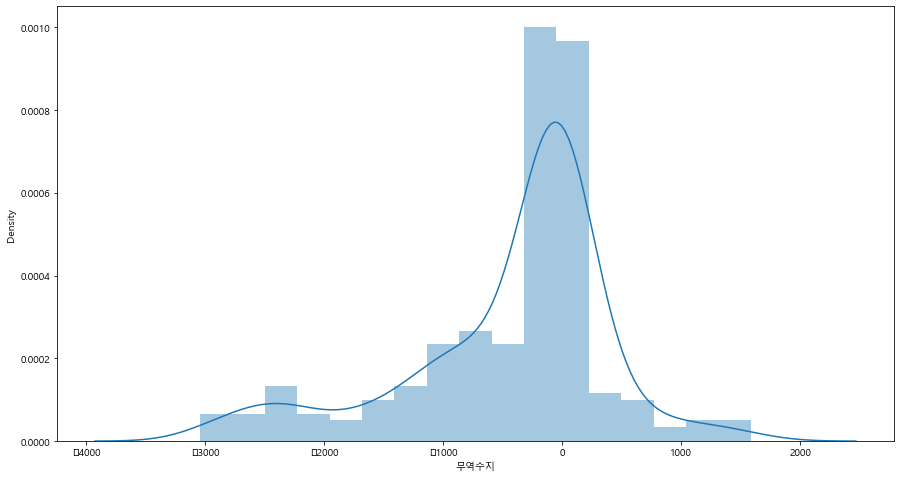

In [94]:
plt.figure(figsize=(15,8))
sns.distplot(df_test['무역수지'])

IndexError: index 2 is out of bounds for axis 0 with size 2

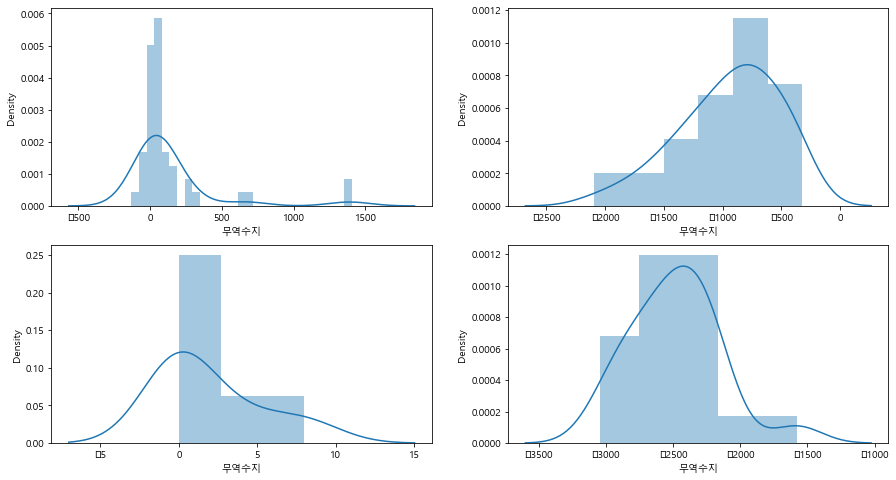

In [95]:
fig , axes = plt.subplots(2,2,figsize=(15,8))
for i in range(len(items)):
    r = int(i/2)
    c = i%2
    sns.distplot(df_test[df_test['품목명']==items[i]]['무역수지'],ax=axes[r][c])